In [14]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer
from matplotlib import pyplot  as plt

dir = 'C:/_dados/'

In [2]:
train = pd.read_csv(dir+'consolidated.txt', sep=';',index_col=0,names=['id','approved','category','word','word_count'])
stemmer = SnowballStemmer("english")

In [3]:
#train = train.head(10000)
train['word_stem'] = train.word.apply(lambda x: stemmer.stem(str(x)))
train.head()

,approved,category,word,word_count,word_stem
id,,,,,
p036502,1,Literacy_Language,MOST,3,most
p036502,1,Literacy_Language,OF,9,of
p036502,1,Literacy_Language,MY,5,my
p036502,1,Literacy_Language,KINDERGARTEN,2,kindergarten
p036502,1,Literacy_Language,STUDENTS,8,student


In [4]:
groups = []
for x in train.groupby('category')['category'].head(1):
    if x not in groups: groups.append(x)
groups

['Literacy_Language',
 'Music_The_Arts',
 'Math_Science',
 'Health_Sports',
 'Applied_Learning',
 'Special_Needs',
 'History_Civics',
 'Warmth_Care_Hunger']

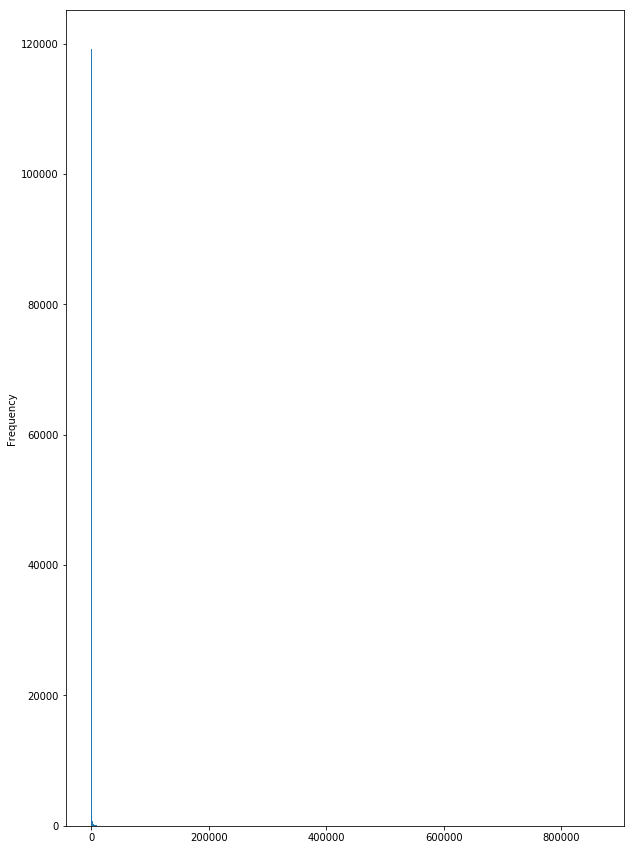

In [20]:
word_sum = train.groupby(['category','word_stem', 'approved'])['word_count'].aggregate('sum').unstack().fillna(0)
word_sum['total'] = word_sum[0] + word_sum[1]

word_sum['total'].plot(kind='hist',bins=1000, figsize=(10,15))

In [6]:
word_sum.to_pickle('C:/_kopp/Dropbox/Filipe/_doutorado/PPGI/REDES-SEM-PESO/matrix_cat.pickle')